In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     472 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [5]:
len(df)

499

In [6]:
import pymysql

In [7]:
connection = pymysql.connect(host='localhost', 

        user='root', 

        password='1234', 

        database='crimesql')

In [8]:
cursor = connection.cursor()

In [9]:
cursor.execute("select * from crime_data")
rows = cursor.fetchall()
for row in rows:
    print(row)

(10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3)
(190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25)
(191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4)
(191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45)
(200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26)
(200100504, '01-04-2020', '01-04-2020', 'Central', 946, 'OTHER MISCELLANEOUS CRIME', 0, 'X', 'POLICE FACILITY', 'IC', '200 E 6TH ST', 34.

In [10]:
y =("select  Crm_Cd_Desc as Crime_Description ,count(*) as Crime_Count from crime_data group by  Crime_Description order by Crime_Count desc limit 15;") 


In [11]:
df_distict_crimecd_descp = pd.read_sql(y,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14260\3394005568.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_distict_crimecd_descp = pd.read_sql(y,connection)


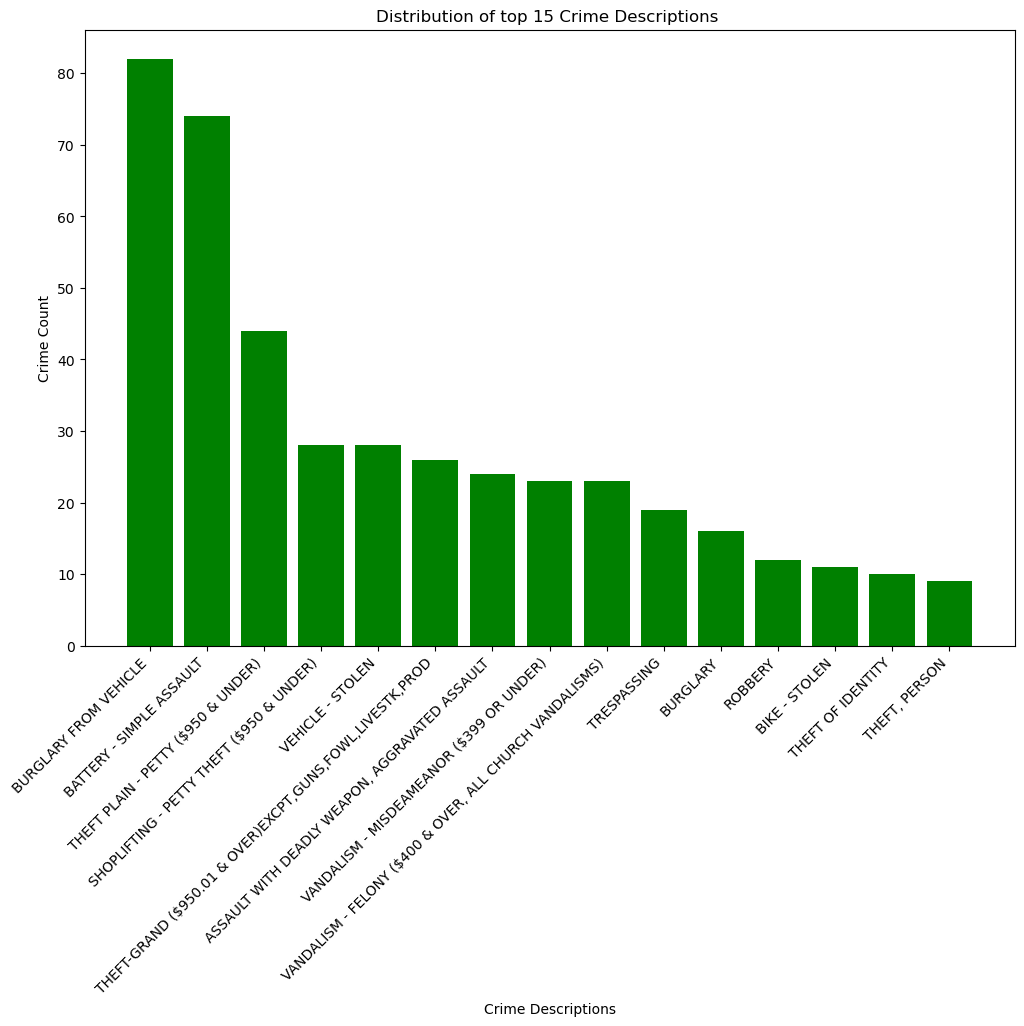

In [12]:
plt.figure(figsize=(12, 8))
bars = plt.bar(df_distict_crimecd_descp['Crime_Description'], df_distict_crimecd_descp['Crime_Count'], color='green')


plt.title('Distribution of top 15 Crime Descriptions ')
plt.xlabel('Crime Descriptions')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
#Where do most crimes occur based on the "Location" column?

 

In [15]:
k = "SELECT Location ,count(*) as Crime_Count from crime_data group by Location order by Crime_Count desc limit 15;"

In [16]:
df_crime_location_count = pd.read_sql(k,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11704\1891257176.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_crime_location_count = pd.read_sql(k,connection)


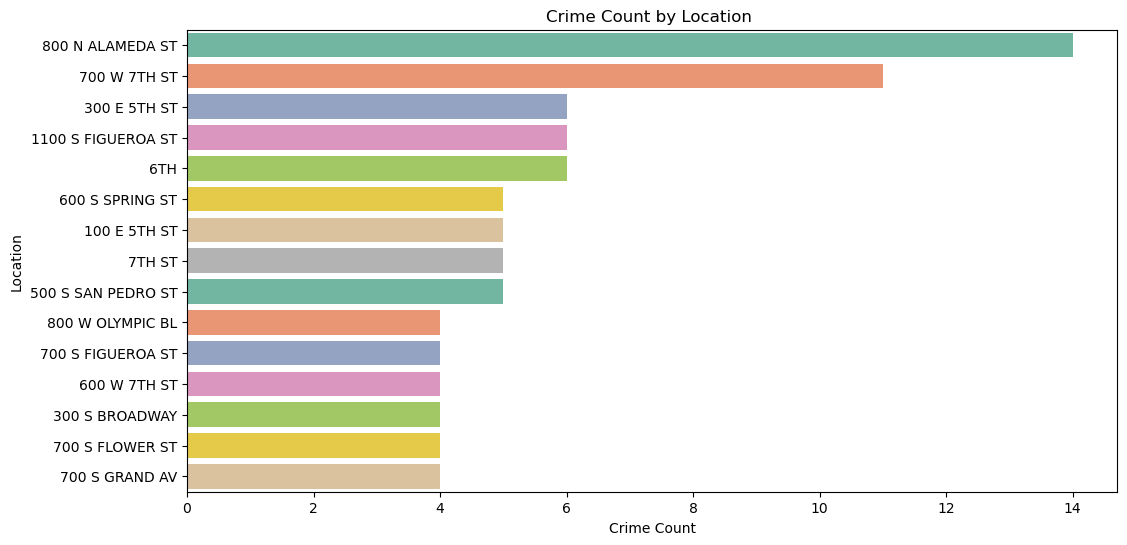

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Crime_Count', y='Location', data=df_crime_location_count, palette='Set2')
plt.title('Crime Count by Location ')
plt.xlabel('Crime Count')
plt.ylabel('Location')
plt.show()

In [18]:
#Is there a significant difference in crime rates between male and female victims?

In [23]:
d = " SELECT Vict_Age,Vict_Sex,COUNT(*) AS Crime_Count FROM crime_data  WHERE Vict_Sex IS NOT NULL GROUP BY Vict_Age,Vict_Sex ORDER BY Vict_Age DESC  LIMIT 20;"


In [24]:
df_VictAge_VictSex = pd.read_sql(d,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3956\3950597344.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_VictAge_VictSex = pd.read_sql(d,connection)


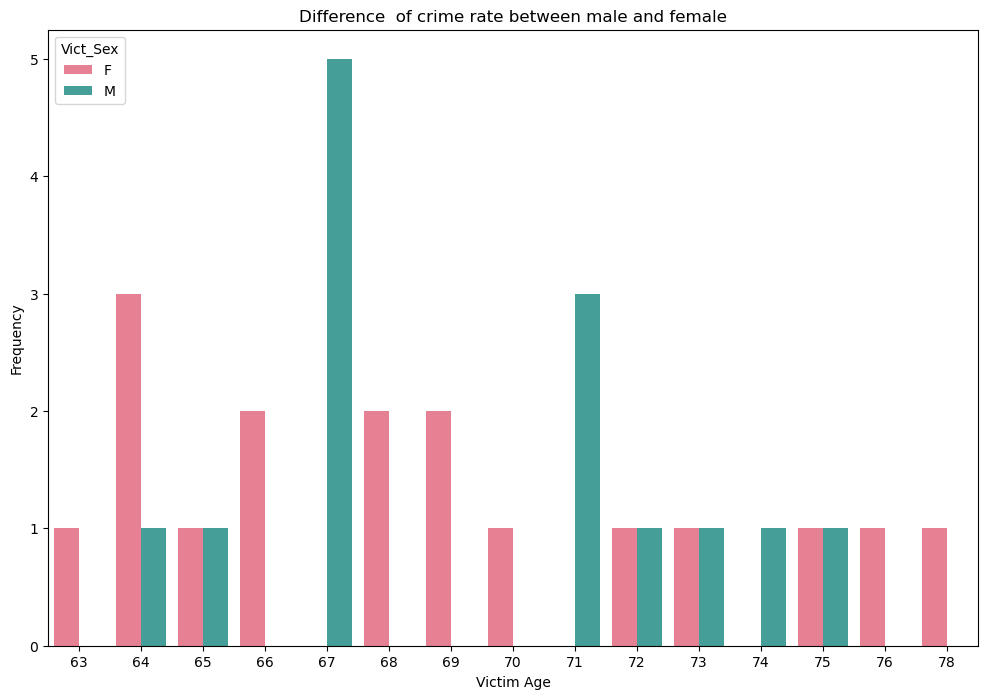

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Vict_Age', y='Crime_Count', hue='Vict_Sex', data=df_VictAge_VictSex, palette='husl')


plt.title('Difference  of crime rate between male and female')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#What is the distribution of victim ages in reported crimes?

In [33]:
p = "SELECT Vict_Age,COUNT(*) AS Crime_Count FROM crime_data WHERE Vict_Age IS NOT NULL GROUP BY Vict_Age ORDER BY Crime_Count desc limit 10;"

In [34]:
df_distribution_victage = pd.read_sql(p,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3956\1361477143.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_distribution_victage = pd.read_sql(p,connection)


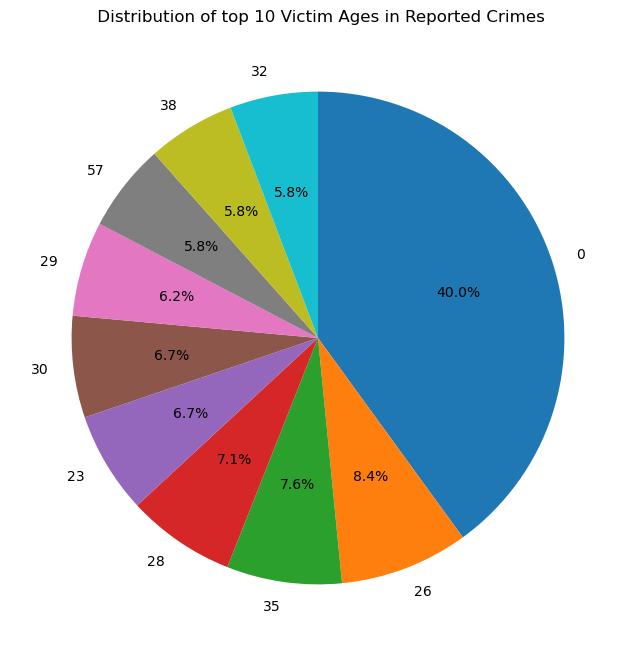

In [51]:
plt.figure(figsize=(8, 8))
plt.pie(df_distribution_victage['Crime_Count'], labels=df_distribution_victage['Vict_Age'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title(' Distribution of top 10 Victim Ages in Reported Crimes')
plt.show()


In [ ]:
#Where are the geographical hotspots for reported crimes?

In [41]:
r = " SELECT LAT, LON, COUNT(*) AS Crime_Count FROM crime_data WHERE LAT IS NOT NULL AND LON IS NOT NULL GROUP BY LAT, LON ORDER BY Crime_Count DESC;"


In [42]:
df_geographical_hotspots = pd.read_sql(r,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3956\1679988017.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_geographical_hotspots = pd.read_sql(r,connection)


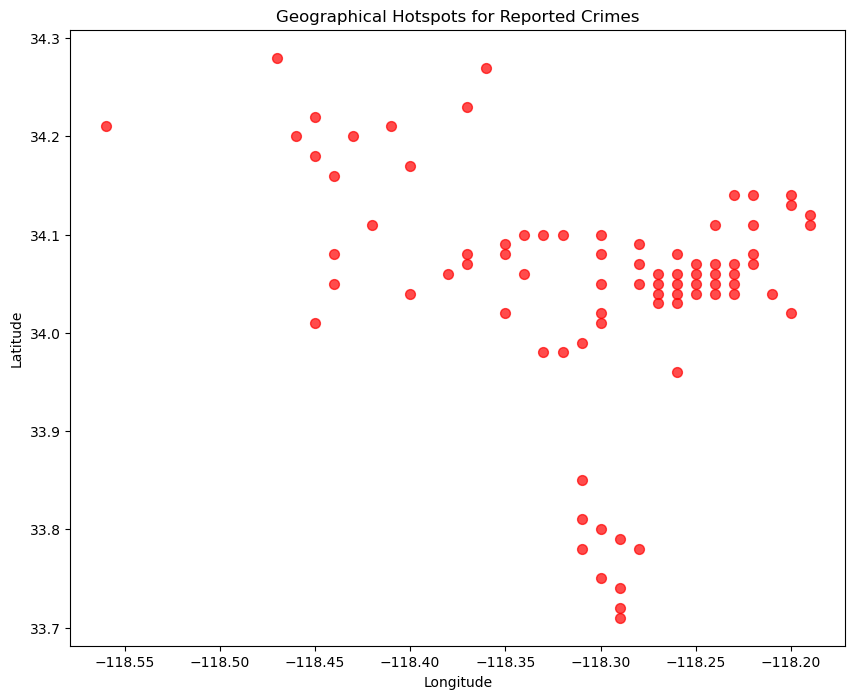

In [49]:
dot_size = 50


plt.figure(figsize=(10, 8))
plt.scatter(df_geographical_hotspots['LON'], df_geographical_hotspots['LAT'], s=dot_size, c='red', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Hotspots for Reported Crimes')
plt.show()


In [52]:
#Identify common premises descriptions where crimes occur.

In [12]:
e = "select  Premis_Desc,count(*) as Crime_Count from crime_data where Premis_Desc is not null group by Premis_Desc order by Crime_Count desc limit 10  ;"

In [13]:
df_Area_Premis_Desc = pd.read_sql(e,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6612\2030247685.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Area_Premis_Desc = pd.read_sql(e,connection)


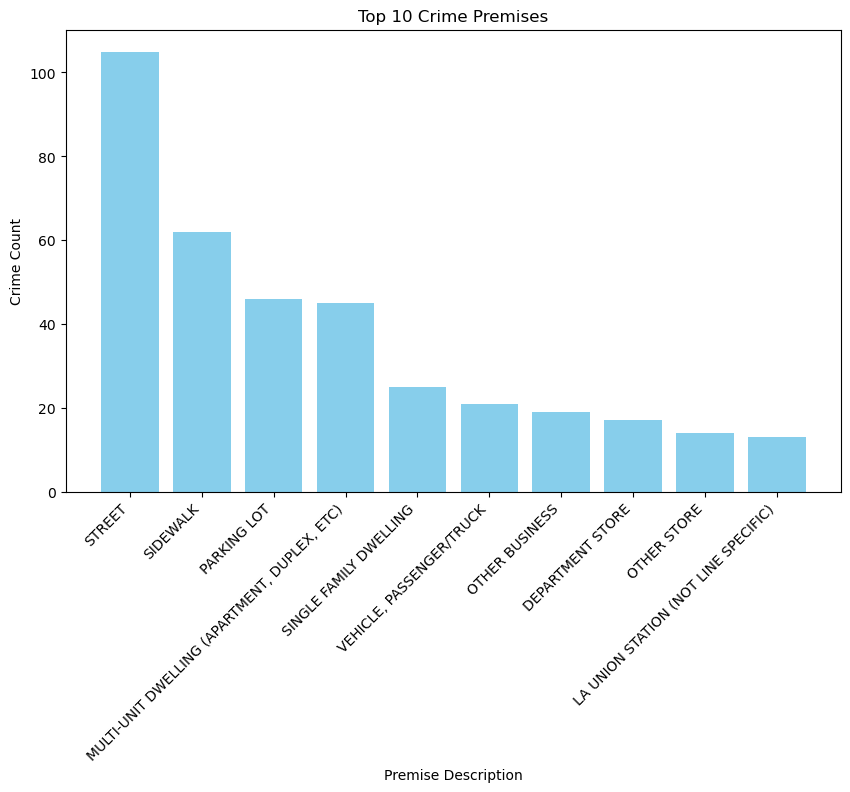

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df_Area_Premis_Desc['Premis_Desc'], df_Area_Premis_Desc['Crime_Count'], color='skyblue')
plt.title('Top 10 Crime Premises')
plt.xlabel('Premise Description')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')

plt.show()

In [1]:
l = "SELECT Crm_Cd, Crm_Cd_Desc, CASE WHEN Status = 'AO' THEN 'Arrest Made' WHEN Status = 'AA' THEN 'Adult Arrest' WHEN Status = 'JO' THEN 'Juvenile Arrest'  WHEN Status = 'IC' THEN 'Invest Continue' ELSE 'Other' END AS Crime_Status_Category FROM  crime_data;"

In [13]:
df_crime_examine_status = pd.read_sql(l,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11500\1713824102.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_crime_examine_status = pd.read_sql(l,connection)


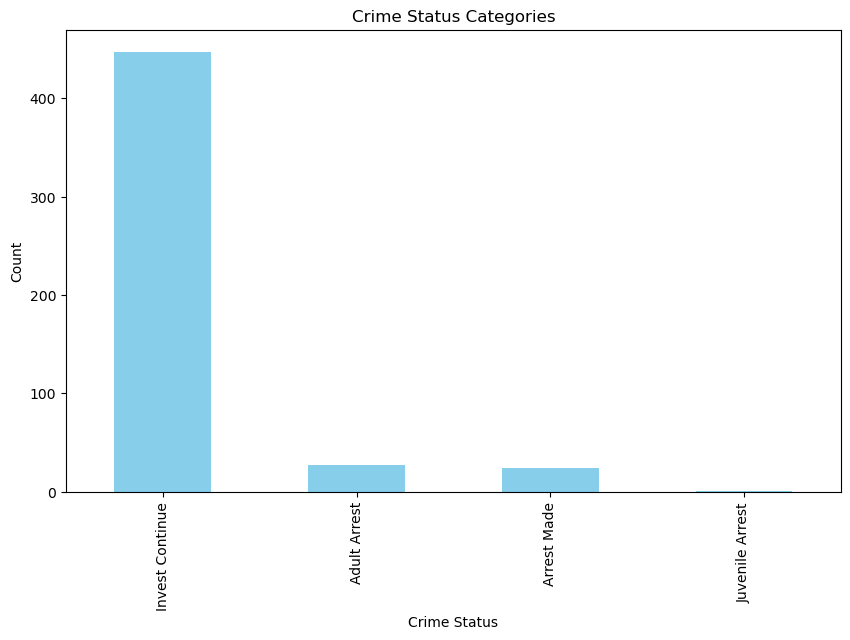

In [15]:
plt.figure(figsize=(10, 6))
df_crime_examine_status['Crime_Status_Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Crime Status Categories')
plt.xlabel('Crime Status')
plt.ylabel('Count')
plt.show()

In [18]:
df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'], format='%m-%d-%Y')



df['Year'] = df['Date_Rptd'].dt.year
df['Month'] = df['Date_Rptd'].dt.month


temporal_analysis = df.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')

print(temporal_analysis)

    Year  Month  Crime_Count
0   2020      1          309
1   2020      2          134
2   2020      3            4
3   2020      4            5
4   2020      5            5
5   2020      6            5
6   2020      7            3
7   2020      8            3
8   2020      9            4
9   2020     10            4
10  2020     11            6
11  2020     12            9
12  2021      1            1
13  2021      3            1
14  2021      4            1
15  2021     11            1
16  2021     12            2
17  2022      2            1
18  2022      8            1


In [21]:
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'],format='%m-%d-%Y')
df['Year'] = df['DATE_OCC'].dt.year
df['Month'] = df['DATE_OCC'].dt.month
temporal_analysis_dateocc = df.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')

print(temporal_analysis_dateocc)

    Year  Month  Crime_Count
0   2020      1          314
1   2020      2          130
2   2020      3            4
3   2020      4            5
4   2020      5            5
5   2020      6            6
6   2020      7            3
7   2020      8            3
8   2020      9            5
9   2020     10            4
10  2020     11            8
11  2020     12           12


In [24]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")

Unique values in DR_NO:
[ 10304468 190101086 191501505 191921269 200100502 200100504 200100507
 200100509 200100510 200100514 200100515 200100520 200914517 200716724
 200100583 200100584 200100587 200218458 200100596 200104020 200104024
 200104027 200104035 200104038 200104039 200104041 200104043 200104047
 200104048 200104051 200104054 200104057 200104058 200104060 200104063
 200104065 200104066 200104069 200104073 200104075 200104076 200104077
 200104078 200104082 200104090 200104092 200918185 200104098 200104118
 200104120 200104126 200104127 200104129 200104132 200104135 200104136
 200104138 200104139 200104141 200104150 200516527 200104187 211422362
 200104192 200104201 200104204 200104205 200104208 200104209 200104221
 200104222 200104223 200104224 200104227 200104228 200104230 200104231
 200104233 200104234 200104235 200104236 200104237 200104238 200409682
 200104244 200306227 200104268 200104269 200104270 200816200 200104275
 200104276 200104277 200104279 200104281 200104283 20

In [42]:
distinct_crime_codes = df[['Crm_Cd', 'Crm_Cd_Desc']].drop_duplicates()
print(distinct_crime_codes)

     Crm_Cd                                        Crm_Cd_Desc
0       624                           BATTERY - SIMPLE ASSAULT
2       745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3       740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
4       442           SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5       946                          OTHER MISCELLANEOUS CRIME
6       341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
7       330                              BURGLARY FROM VEHICLE
8       930             CRIMINAL THREATS - NO WEAPON DISPLAYED
10      648                                              ARSON
12      354                                  THEFT OF IDENTITY
14      230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
17      761                                    BRANDISH WEAPON
19      350                                      THEFT, PERSON
22      310                                           BURGLARY
25      480                                      BIKE -

In [ ]:
#What is the distribution of reported crimes based on Crime Code?

In [19]:
p = "SELECT Crm_Cd,Crm_Cd_Desc,  COUNT(*) AS Crime_Count FROM crime_data GROUP BY Crm_Cd , Crm_Cd_Desc ORDER BY Crime_Count DESC limit 20; "

In [20]:
df_distribution_crimecode = pd.read_sql(p,connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11704\902482995.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_distribution_crimecode = pd.read_sql(p,connection)


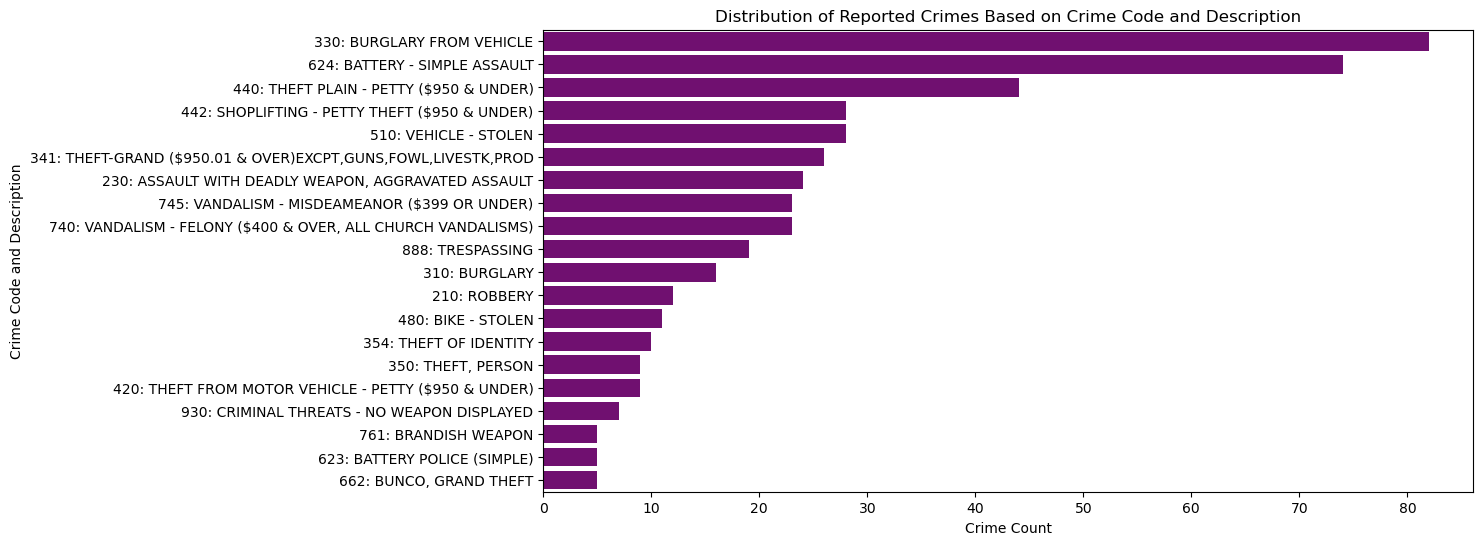

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Crime_Count', y=df_distribution_crimecode['Crm_Cd'].astype(str) + ': ' + df_distribution_crimecode['Crm_Cd_Desc'],
            data=df_distribution_crimecode, color='purple')

plt.xlabel('Crime Count')
plt.ylabel('Crime Code and Description')
plt.title('Distribution of Reported Crimes Based on Crime Code and Description')

plt.show()

In [37]:
y = "SELECT DATE_OCC AS Crime_Date_Occurance, COUNT(*) AS Crime_Count FROM crime_data group by DATE_OCC order by DATE_OCC;"


In [38]:
df_crime_date = pd.read_sql(y,connection) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14320\3542171931.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_crime_date = pd.read_sql(y,connection)


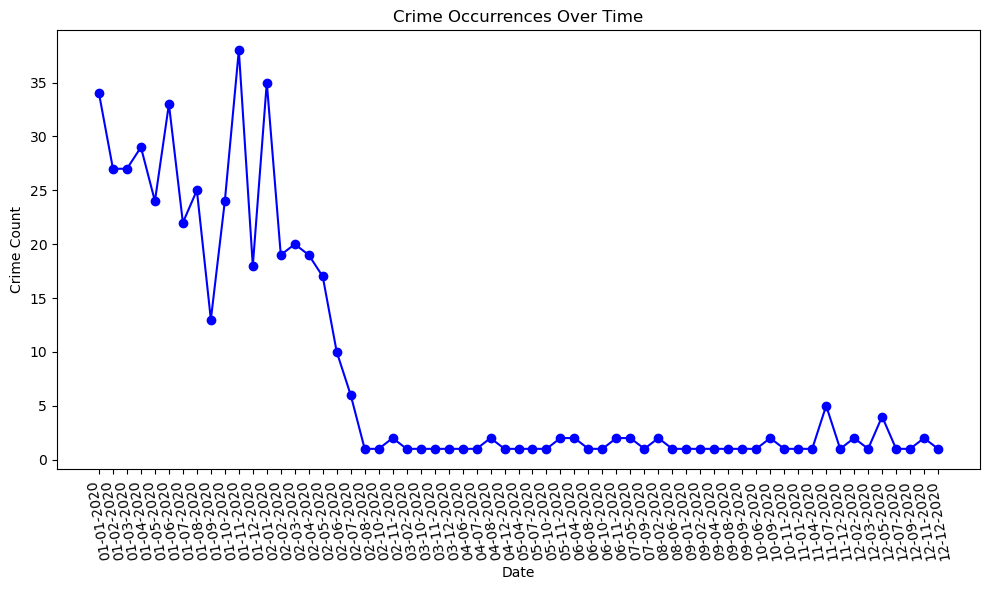

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df_crime_date['Crime_Date_Occurance'], df_crime_date['Crime_Count'], marker='o', linestyle='-', color='b')
plt.title('Crime Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.xticks(rotation=100)
plt.tight_layout()


plt.show()